In [1]:
from model import BCModel
import matplotlib.pyplot as plt
import numpy as np
import stats
import pandas as pd
import seaborn as sns

In [2]:
params = {
    "seed": 100, 
    "num_agents": 200, 
    "epsilon_max": 0.30, 
    "epsilon_min": 0,
    "alpha": 2,
    "beta": 4,
    "mu": 0, 
    "num_runs": 300
}

In [3]:
model = BCModel(params) # No dict unpacking because we use 'get'

In [4]:
model.step()

In [5]:
results = model.datacollector.get_model_vars_dataframe()

In [6]:
results

,MeanOpinions,MedianOpinions,OpinionDistr,mu
0,0.512622,0.497505,"[0.8347698077033574, 0.5651603831007759, 0.977...",0
1,0.513717,0.502903,"[0.8410468652967957, 0.535674654395618, 0.9725...",0
2,0.514898,0.491259,"[0.8413000172365628, 0.50741937478537, 0.96345...",0
3,0.517470,0.481393,"[0.8472617234957903, 0.4959736735954013, 0.957...",0
4,0.519706,0.468138,"[0.8548474187940757, 0.47597539283581886, 0.95...",0
...,...,...,...,...
295,0.658756,0.551814,"[0.9348302592729213, 0.5518139697743635, 0.934...",0
296,0.658756,0.551814,"[0.9348302592729213, 0.5518139697743635, 0.934...",0
297,0.658756,0.551814,"[0.9348302592729213, 0.5518139697743635, 0.934...",0
298,0.658756,0.551814,"[0.9348302592729213, 0.5518139697743635, 0.934...",0


In [7]:
(results.iloc[-1]["MeanOpinions"], results.iloc[-1]["MedianOpinions"])

(np.float64(0.6587560449673018), np.float64(0.5518139697743635))

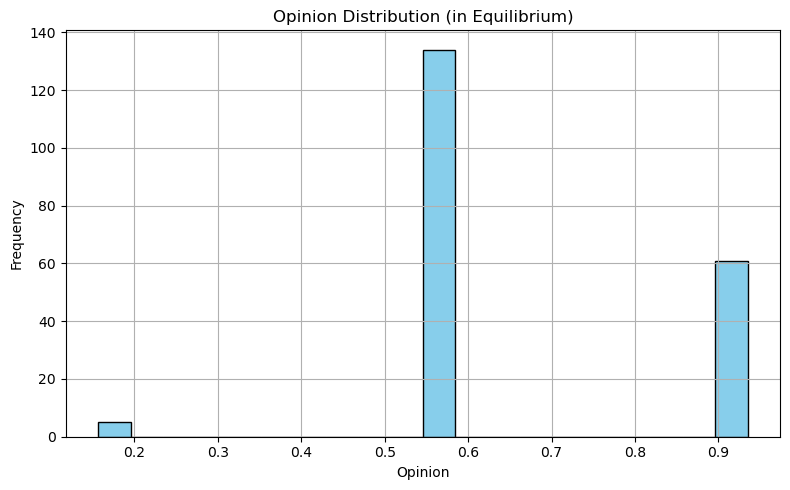

In [8]:
# Extract the 'OpinionDistr' from the last row
last_opinion_distribution = results.iloc[-1]["OpinionDistr"]

# Plot a histogram
plt.figure(figsize=(8, 5))
plt.hist(last_opinion_distribution, bins=20, color='skyblue', edgecolor='black')
plt.title("Opinion Distribution (in Equilibrium)")
plt.xlabel("Opinion")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
checks = model.datacollector.get_agent_vars_dataframe()

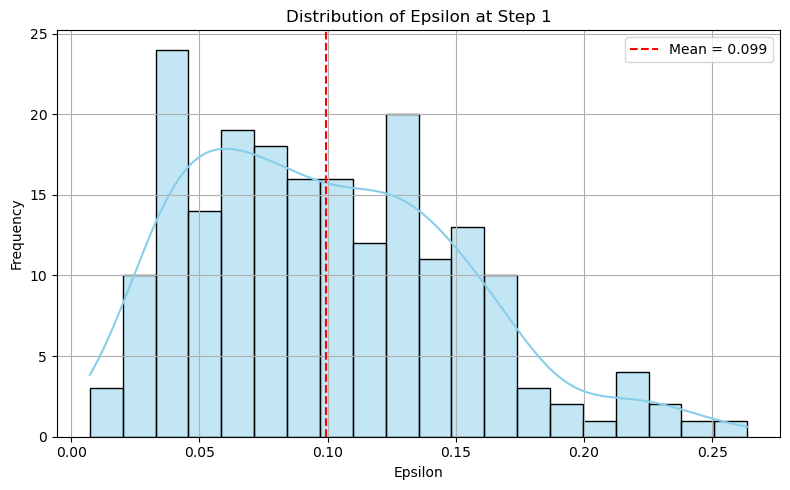

In [10]:
epsilons_step1 = checks.loc[1]["epsilon"]

# Compute summary statistics
mean_eps = epsilons_step1.mean()
std_eps = epsilons_step1.std()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(epsilons_step1, bins=20, kde=True, color="skyblue", edgecolor="black")

# Annotate with stats
plt.axvline(mean_eps, color='red', linestyle='--', label=f'Mean = {mean_eps:.3f}')
plt.title("Distribution of Epsilon at Step 1")
plt.xlabel("Epsilon")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()